In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Rect de media onda

```
 _____ -V0 (SIN)+ _______ +Diodo- ________ R ____   
|                     |               |          |  
GND                  Vin             Vout       GND
```


- Resistencia $R=1$ $k\Omega$
- Diodo de silicio, tensión de apertura $\Delta V\approx0.7$ $V$
- Fuente sinusoidal, de aplitud $5V$, frecuencia $f=500$ $Hz$



### Cargo datos

<Axes: xlabel='t'>

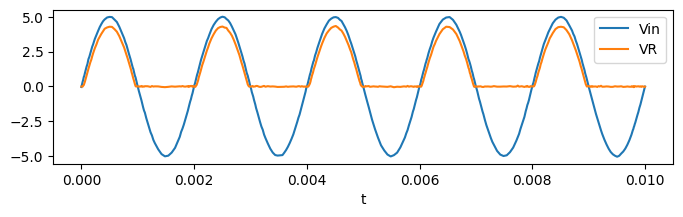

In [3]:
df = pd.read_csv("datos/rect_media_onda.csv")
df.plot( x='t', y=["Vin","VR"],figsize=(8,2) )

## Análisis del comportamiento de la señal

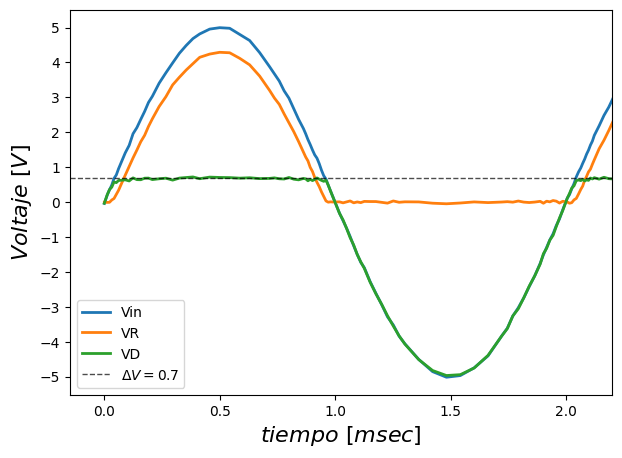

In [ ]:
df_mues = df[ df["t"]<0.003 ].copy()
df_mues["t"]*=1e3 # paso a mili sec
df_mues["VD"] = df_mues["Vin"]-df_mues["VR"] # calculo tensión en diodo

# plot
fig, ax = plt.subplots(figsize=(7,5))

df_mues.plot( x='t', y=["Vin","VR","VD"],ax=ax,linewidth=2 )

ax.axhline( 0.7, linestyle='--', linewidth=1, c='black', alpha=0.7, label='$\Delta V=0.7$' )

ax.set_ylabel("$Voltaje$ $[V]$", fontsize=16)
ax.set_xlabel("$tiempo$ $[msec]$", fontsize=16)
ax.set_xlim(None,2.2)
ax.set_yticks(np.linspace(-5,5,11))
ax.legend(loc=3)
plt.show()

### Observaciones:

- De t=0 hasta t apertura. Estamos debajo de la tensión de apertura, el circuito esta abierto, toda la tensión de la fuente cae en el diodo. Como no circula corriente en la rama, no cae tensión en la resistencia.

- A t apertura, empieza a circular corriente, la tensión en el diodo se fija en 0.7,  y el resto de la tensión de la fuente cae en la resistencia.

- Luego de un semi periodo, la tensión de la fuente vuelve a caer por debajo de 0.7 y deja de circular corriente. No cae tensión en la resistencia, toda la tensión de la fuente cae en el diodo.


## Caracterización 

Calculamos algunos parámetros estadísticos para caracterizar la señal de salida del rectificador (VR)

Stats:
Valor medio VR (mean): 0.960 [V]
Desv estand VR (std) : 1.388 [V]
Valor Pk2Pk (max-min): 4.398 [V]
Factor de ripple γ : 144.565 % (Hay que mejorar)


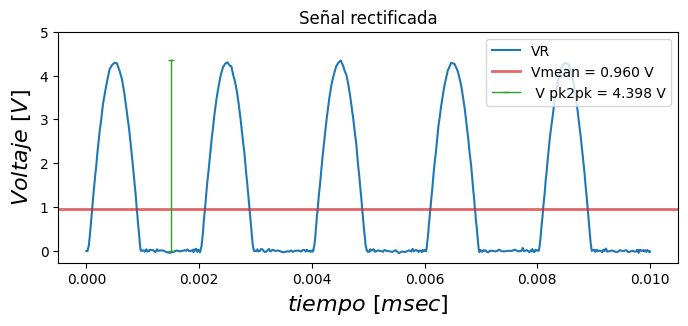

In [ ]:
mu = df['VR'].mean()
sd = df['VR'].std()
Vpk2pk = df['VR'].max()-df['VR'].min()

ripple = 100*sd/mu
interpretacion = "Aceptable" if ripple<10 else "Hay que mejorar"

print("Stats:")
print(f"Valor medio VR (mean): {mu:.3f} [V]")
print(f"Desv estand VR (std) : {sd:.3f} [V]")
print(f"Valor Pk2Pk (max-min): {Vpk2pk:.3f} [V]")
print(f"Factor de ripple γ : {ripple:.3f} % ({interpretacion})")


# plot
fig, ax = plt.subplots(figsize=(8,3))

df.plot(x='t',y="VR", title="Señal rectificada", ax=ax )

ax.axhline( df['VR'].mean(), linewidth=2, c='C3', alpha=0.7, label=f'Vmean = {mu:.3f} V' )

ax.plot(
    [0.0015, 0.0015],     # Coordenadas X (constantes)
    [0, df['VR'].max()],  # Coordenadas Y (el rango)
    color='C2',
    linestyle='-',
    lw=1,
    marker='_',           
    markersize=5,
    label=f" V pk2pk = {Vpk2pk:.3f} V" 
)

ax.set_ylabel("$Voltaje$ $[V]$", fontsize=16)
ax.set_xlabel("$tiempo$ $[msec]$", fontsize=16)
ax.set_yticks(np.linspace(0,5,6))
ax.legend(loc=1)
plt.show()